In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_dir = r"C:\Users\pinku\Downloads\Gesture-Recognition-with-double-point\Data"
all_data = []

for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        gesture_name = file.replace("gesture_data_", "").replace(".csv", "")
        df = pd.read_csv(os.path.join(data_dir, file))
        df["gesture"] = gesture_name  # label column
        all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)
print(f"✅ Loaded {len(df_all)} total samples from {len(all_data)} gesture files")
print("Columns:", df_all.columns.tolist())

# --- 2️⃣ Remove unnecessary columns ---
# Drop non-numeric or irrelevant columns
cols_to_drop = [col for col in ["timestamp", "label"] if col in df_all.columns]
X = df_all.drop(columns=cols_to_drop + ["gesture"], errors="ignore")
y = df_all["gesture"]

# Ensure numeric-only features
X = X.select_dtypes(include=[np.number])

print(f"Feature columns used: {list(X.columns)}")
print(f"Number of gestures: {y.nunique()} → {list(y.unique())}")

# --- 3️⃣ Normalize numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4️⃣ Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

✅ Loaded 28503 total samples from 3 gesture files
Columns: ['timestamp', 'accel_x', 'accel_y', 'accel_z', 'gravity_x', 'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'orient_x', 'orient_y', 'orient_z', 'orient_w', 'mag_x', 'mag_y', 'mag_z', 'mag_cal_x', 'mag_cal_y', 'mag_cal_z', 'label', 'gesture']
Feature columns used: ['accel_x', 'accel_y', 'accel_z', 'gravity_x', 'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'orient_x', 'orient_y', 'orient_z', 'orient_w', 'mag_x', 'mag_y', 'mag_z', 'mag_cal_x', 'mag_cal_y', 'mag_cal_z']
Number of gestures: 3 → ['Backward', 'Forward', 'wave hand']


c:\Users\pinku\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\pinku\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\pinku\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



📊 Classification Report:

              precision    recall  f1-score   support

    Backward       1.00      1.00      1.00      1906
     Forward       1.00      1.00      1.00      1904
   wave hand       1.00      1.00      1.00      1891

    accuracy                           1.00      5701
   macro avg       1.00      1.00      1.00      5701
weighted avg       1.00      1.00      1.00      5701



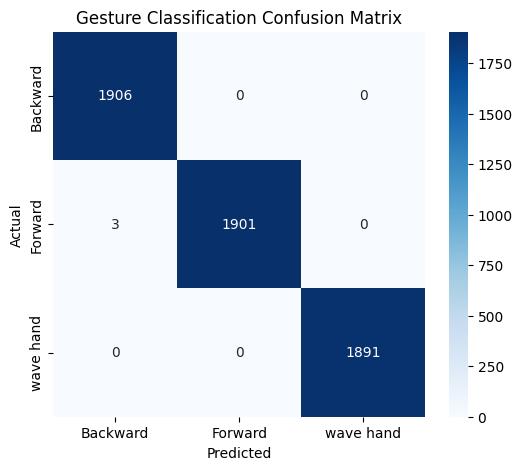

In [7]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# --- 6️⃣ Evaluate ---
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# --- 7️⃣ Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gesture Classification Confusion Matrix")
plt.show()


In [9]:
import joblib
joblib.dump(clf, "gesture_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
